In [1]:
#%load_ext autoreload
#%autoreload 2
%matplotlib inline
%cd '../HOTS'

/Users/joe/Documents/boulot/git/homhots/HOTS/HOTS


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import os
import pickle
from mix_Network import *
from Event import Event
from Tools import LoadObject, EuclidianNorm, NormalizedNorm, BattachaNorm

In [3]:
def EuclidianNorm(hist1,hist2):
    return np.linalg.norm(hist1-hist2)

def NormalizedNorm(hist1,hist2):
    hist1/=np.sum(hist1)
    hist2/=np.sum(hist2)
    return np.linalg.norm(hist1-hist2)/(np.linalg.norm(hist1)*np.linalg.norm(hist2))

def BattachaNorm(hist1, hist2):
    hist1/=np.sum(hist1)
    hist2/=np.sum(hist2)
    return -np.log(np.sum(np.sqrt(hist1*hist2)))

def accuracy(trainmap,testmap,measure):
    accuracy=0

    for i in range(len(testmap)):
        dist = np.zeros([len(trainmap)])
        for k in range(len(trainmap)):
            if measure=='bhatta':
                dist[k] = BattachaNorm(testmap[i][1],trainmap[k][1])
            elif measure=='eucli':
                dist[k] = EuclidianNorm(testmap[i][1],trainmap[k][1])
            elif measure=='norm':
                dist[k] = NormalizedNorm(testmap[i][1],trainmap[k][1])
        if testmap[i][0]==trainmap[np.argmin(dist)][0]:
            accuracy+=1
    return accuracy

# 1. Initialisation of the time-surfaces (TS)
## 1.1. In Lagorce 2017, initialisation is done with the first N TS

In [4]:
fname = "../Records/EXP_01_LagorceKmeans/2020-11-26-mix_hots_validation.pkl"
if not os.path.isfile(fname):
    hots = network(algo='lagorce', krnlinit='first', tau=0.00002)
    hots.learninglagorce()
    with open(fname, 'wb') as file:
        pickle.dump(hots, file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hots = pickle.load(file)

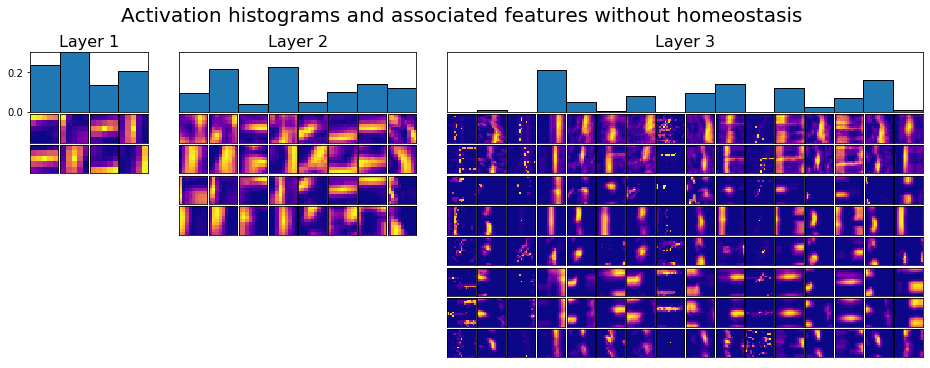

In [5]:
hots.plotlayer()

## 1.2. Random initialisation of the TS 

In [6]:
fname = "../Records/EXP_01_LagorceKmeans/2020-11-26-mix_hots_validation_randominit.pkl"
if not os.path.isfile(fname):
    hotsrdn = network(algo='lagorce', krnlinit='rdn', tau=0.00002)
    hotsrdn.learninglagorce()
    with open(fname, 'wb') as file:
        pickle.dump(hotsrdn, file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hotsrdn = pickle.load(file)

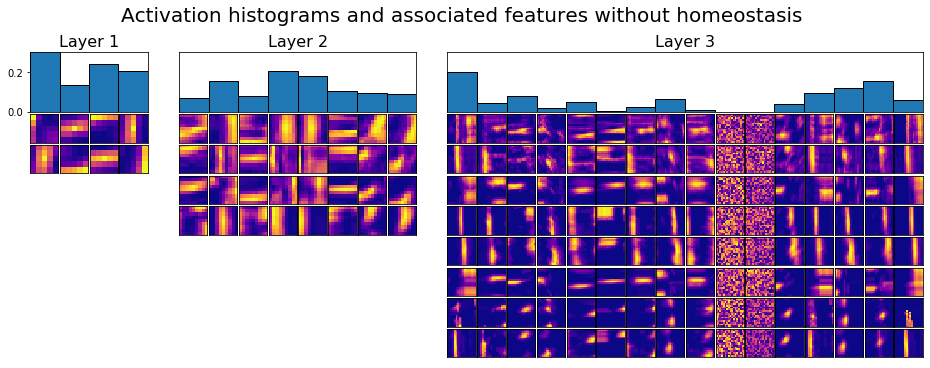

In [7]:
hotsrdn.plotlayer()

In [8]:
trainmaprdn = hotsrdn.traininglagorce()
testmaprdn = hotsrdn.traininglagorce()

100%|██████████| 520844/520844 [08:18<00:00, 1044.78it/s]


In [9]:
score1=accuracy(trainmaprdn,testmaprdn,'bhatta')
score2=accuracy(trainmaprdn,testmaprdn,'eucli')
score3=accuracy(trainmaprdn,testmaprdn,'norm')
print('bhatta:'+str(score1/0.4)+'% - '+'eucli:'+str(score2/0.4)+'% - '+'norm:'+str(score3/0.4)+'%')

bhatta:90.0% - eucli:90.0% - norm:90.0%


# 2. Filtering
## 2.1 Filtering only the TS on the first layer of the network

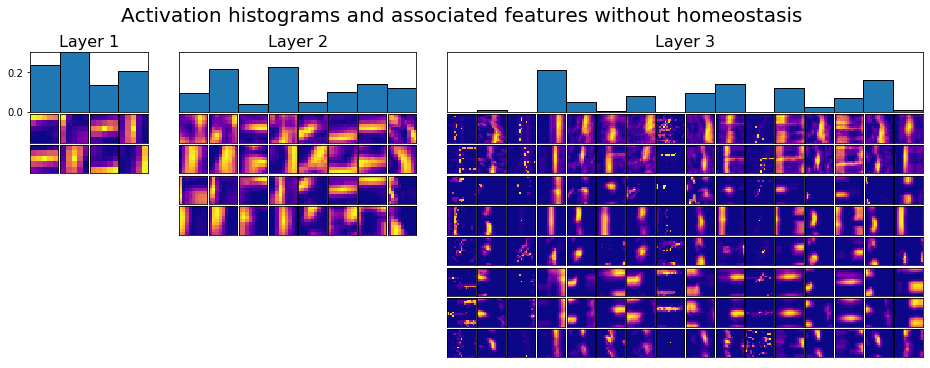

In [10]:
fname = "../Records/EXP_01_LagorceKmeans/2020-11-26-mix_hots_validation.pkl"
if not os.path.isfile(fname):
    hots = network(algo='lagorce', krnlinit='first', tau=0.00002)
    hots.learninglagorce()
    with open(fname, 'wb') as file:
        pickle.dump(hots, file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hots = pickle.load(file)
hots.plotlayer()

## 2.2 Filtering TS on every layer

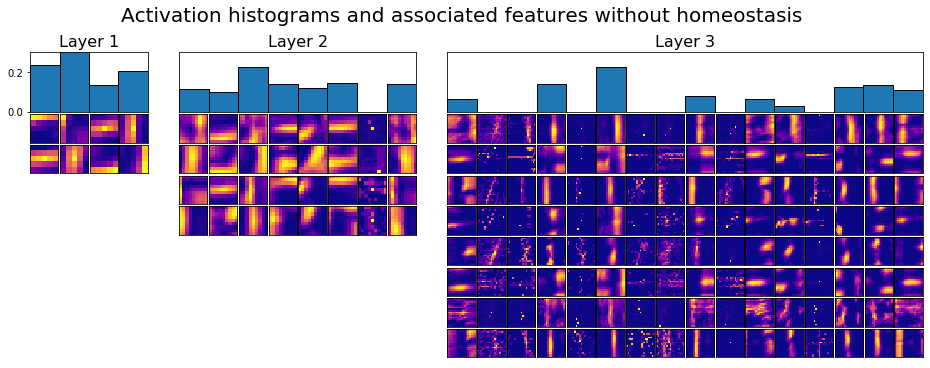

In [11]:
fname = "../Records/EXP_01_LagorceKmeans/2020-11-26-mix_hots_validation_filterall.pkl"
if not os.path.isfile(fname):
    hotsfilt = network(algo='lagorce', krnlinit='first', tau=0.00002)
    hotsfilt.learninglagorce(filtering='all')
    with open(fname, 'wb') as file:
        pickle.dump(hotsfilt, file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hotsfilt = pickle.load(file)
hotsfilt.plotlayer()

In [12]:
trainmapfilt = hotsfilt.traininglagorce()
testmapfilt = hotsfilt.traininglagorce()
score1=accuracy(trainmapfilt,testmapfilt,'bhatta')
score2=accuracy(trainmapfilt,testmapfilt,'eucli')
score3=accuracy(trainmapfilt,testmapfilt,'norm')
print('bhatta:'+str(score1/0.4)+'% - '+'eucli:'+str(score2/0.4)+'% - '+'norm:'+str(score3/0.4)+'%')

100%|██████████| 520844/520844 [08:09<00:00, 1064.57it/s]


bhatta:90.0% - eucli:90.0% - norm:90.0%


## 2.3. Applying stronger filter (2*R -> 5*R)

In [ ]:
fname = "../Records/EXP_01_LagorceKmeans/2020-11-26-mix_hots_validation_filtx5.pkl"
if not os.path.isfile(fname):
    hotsfiltx5 = network(algo='lagorce', krnlinit='first', tau=0.00002, filt=5)
    hotsfiltx5.learninglagorce(filtering='all')
    with open(fname, 'wb') as file:
        pickle.dump(hotsfiltx5, file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hotsfiltx5 = pickle.load(file)
hotsfiltx5.plotlayer()

 49%|████▉     | 109578/223371 [00:51<01:00, 1889.35it/s]

In [20]:
print(hotsfiltx5.L[2].nbtrain)

223290


In [14]:
trainmapfiltx5 = hotsfiltx5.traininglagorce()
testmapfiltx5 = hotsfiltx5.traininglagorce()
score1=accuracy(trainmapfiltx5,testmapfiltx5,'bhatta')
score2=accuracy(trainmapfiltx5,testmapfiltx5,'eucli')
score3=accuracy(trainmapfiltx5,testmapfiltx5,'norm')
print('bhatta:'+str(score1/0.4)+'% - '+'eucli:'+str(score2/0.4)+'% - '+'norm:'+str(score3/0.4)+'%')

100%|██████████| 520844/520844 [07:39<00:00, 1132.80it/s]


bhatta:90.0% - eucli:90.0% - norm:90.0%
